## Loan Dataset

Dataset Link:  https://www.kaggle.com/datasets/burak3ergun/loan-data-set

Dream Housing Finance company deals in all home loans. They have presence across all urban, semi urban and rural areas. Customer first apply for home loan after that company validates the customer eligibility for loan.

### Problem
Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers. Here they have provided a partial data set.

### Important Libraries 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### The Dataset 

In [2]:
# calling the dataset
path = './loan_data_set.csv'
df = pd.read_csv(path)
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


### Data Exploration

In [3]:
# deleting the Loan_ID columns
df = df.drop(["Loan_ID"], axis=1)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [16]:
# dimesion of the dataframe
df.shape

(614, 12)

In [17]:
# converting the Credit_History into  object datatype
df["Credit_History"] = df["Credit_History"].astype('object')

In [18]:
# datatypes of different columns
df.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History        object
Property_Area         object
Loan_Status           object
dtype: object

In [4]:
# creating variables lists according to type
cat_var = list(df.select_dtypes(include=['object']).columns)
num_var = list(df.select_dtypes(include=['int64','float64']))

### Checking for the presence of missing values

In [20]:
# % missing values in each columns
100*df.isnull().mean()

Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

### Checking for the Imbalance in the dataset

In [5]:
# checking the imbalance in the dataset
df["Loan_Status"].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

### Visualisations

In [3]:
# checking the median according to different Loan_Status
df = pd.read_csv("./loan_data_set.csv")
df.groupby('Loan_Status')["LoanAmount"].median()

Loan_Status
N    129.0
Y    126.0
Name: LoanAmount, dtype: float64

In [4]:
# creating crosstables with Loan_Status with other categorcal type variables
pd.crosstab(df["Gender"], df["Loan_Status"])

Loan_Status,N,Y
Gender,,
Female,37,75
Male,150,339


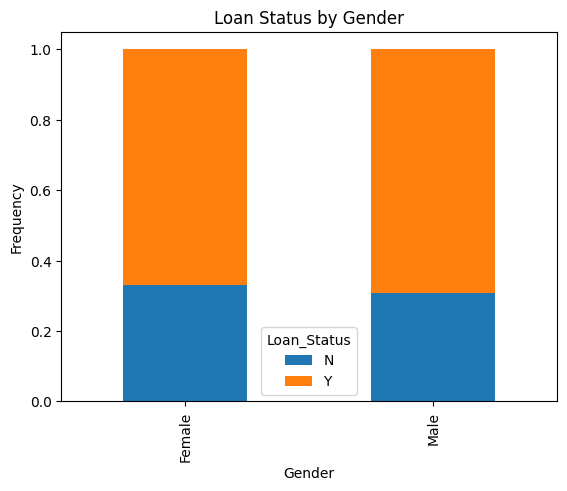

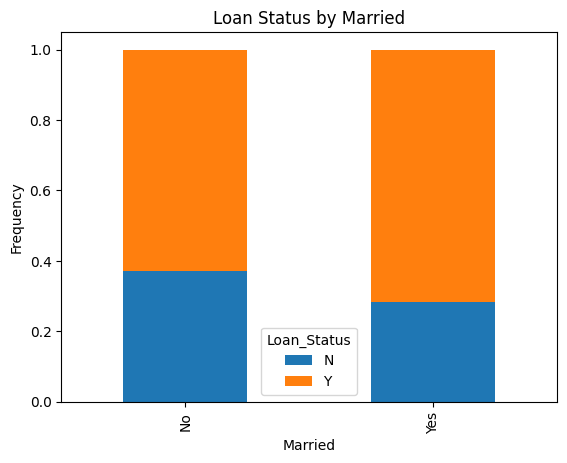

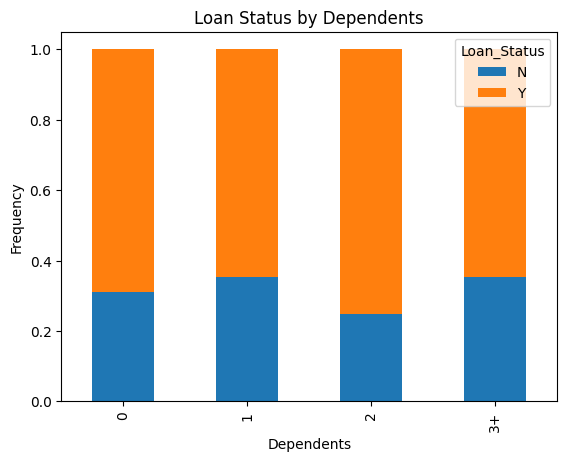

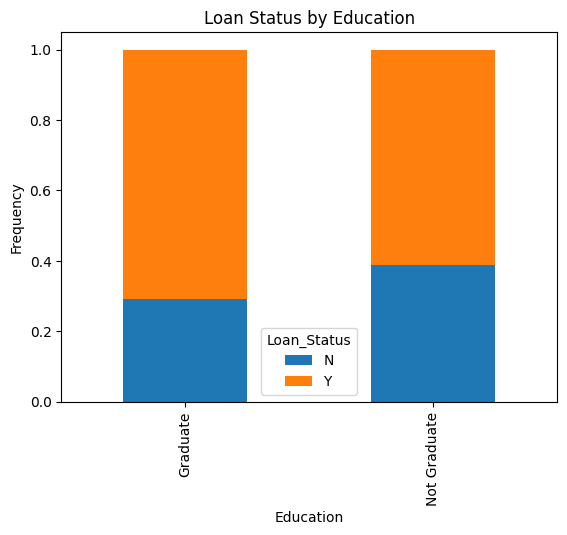

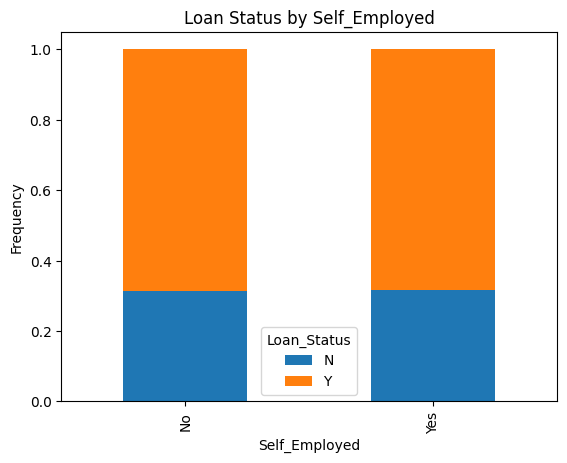

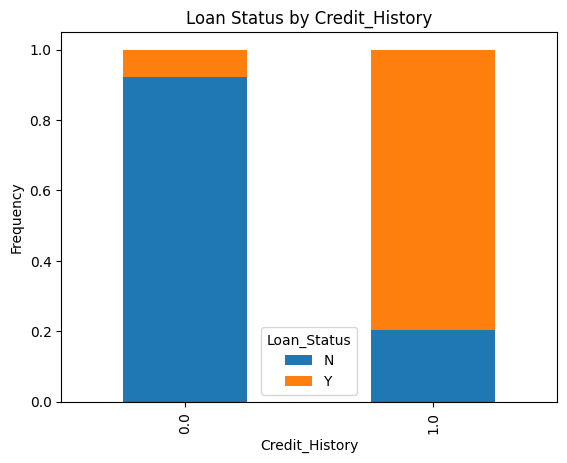

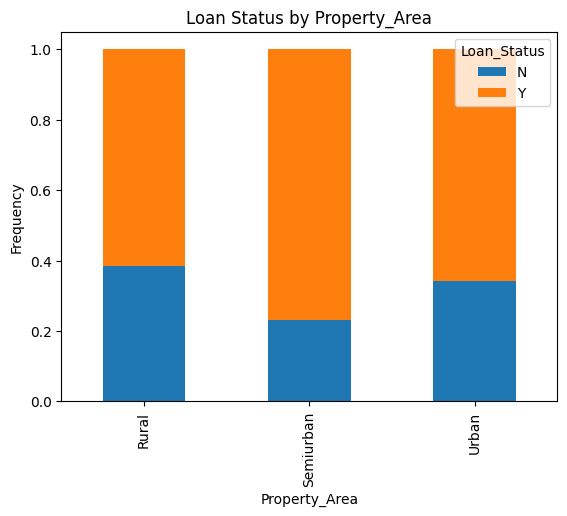

In [21]:
# creating barplots of the number of Count in different categorical variables according to different Loan_Status
for feat in [x for x in cat_var if x!='Loan_Status']:
    cross_tab = pd.crosstab(df[feat], df['Loan_Status'])
    cross_tab.plot

    row_total = cross_tab.sum(axis=1)
    prop_table = cross_tab.div(row_total, axis=0)   
    
    prop_table.plot.bar(stacked=True)
    plt.xlabel(feat)
    plt.ylabel('Frequency')
    plt.title(f'Loan Status by {feat}')

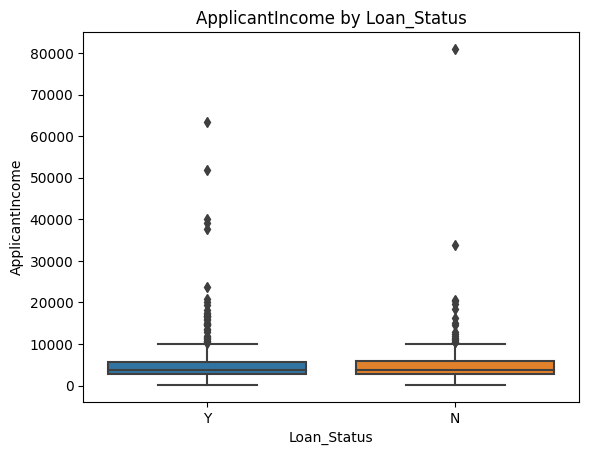

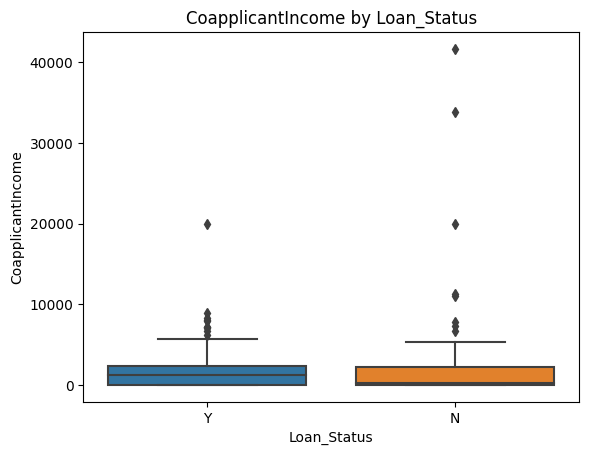

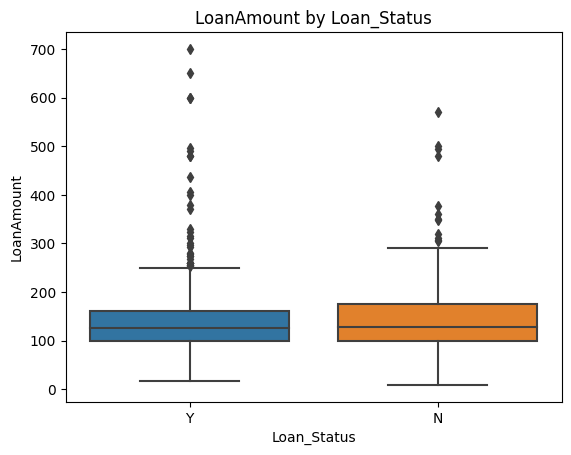

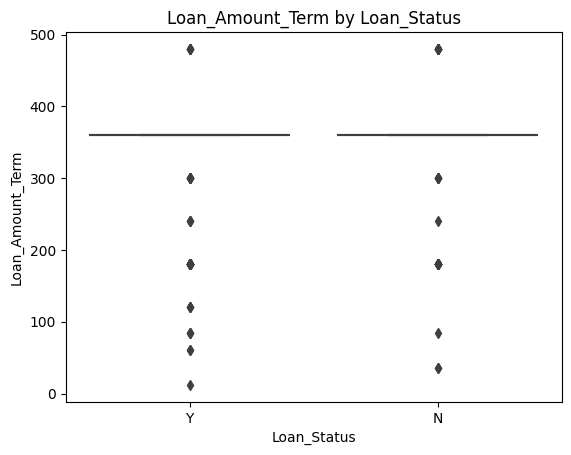

In [22]:
# boxplots of numerical variables according to different Loan_Status
for feat in num_var:
    sns.boxplot(data=df, x='Loan_Status', y=feat)
    plt.xlabel('Loan_Status')
    plt.ylabel(feat)
    plt.title(f'{feat} by Loan_Status')
    plt.show()

Text(0, 0.5, 'Variance')

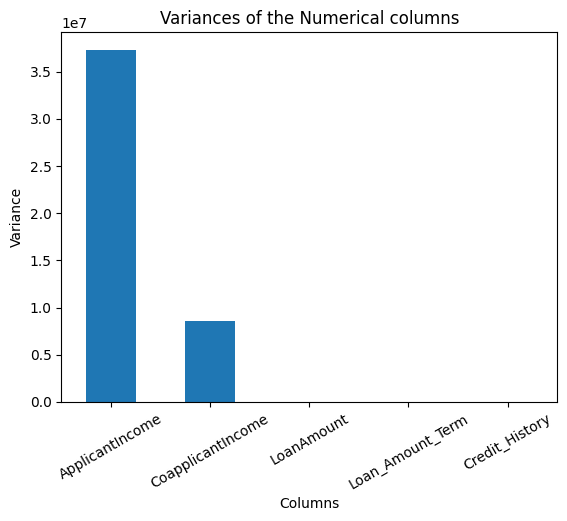

In [16]:
# barplots of different variances of the Numeriacal variables
df[num_var].var().plot.bar()
plt.title("Variances of the Numerical columns")
plt.xlabel("Columns")
plt.xticks(rotation = 30)
plt.ylabel("Variance")